In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("insurance.csv")
df.head(20)

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
5,31,female,25.7,0,no,southeast,3756.62
6,46,female,33.4,1,no,southeast,8240.59
7,37,female,27.7,3,no,northwest,7281.51
8,37,male,29.8,2,no,northeast,6406.41
9,60,female,25.8,0,no,northwest,28923.14


In [8]:
df.shape

(1338, 7)

In [9]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [10]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


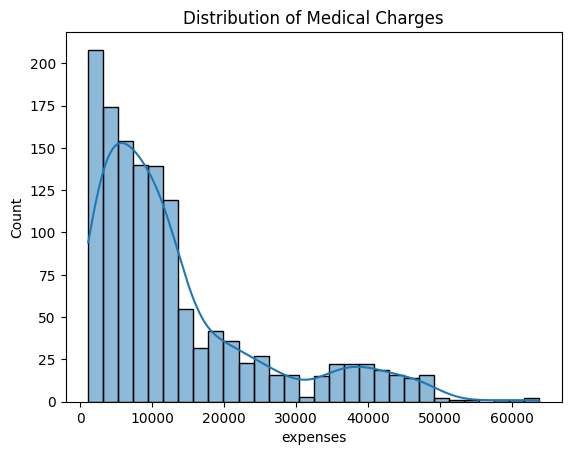

In [11]:
sns.histplot(df["expenses"], kde=True)
plt.title("Distribution of Medical Charges")
plt.show()

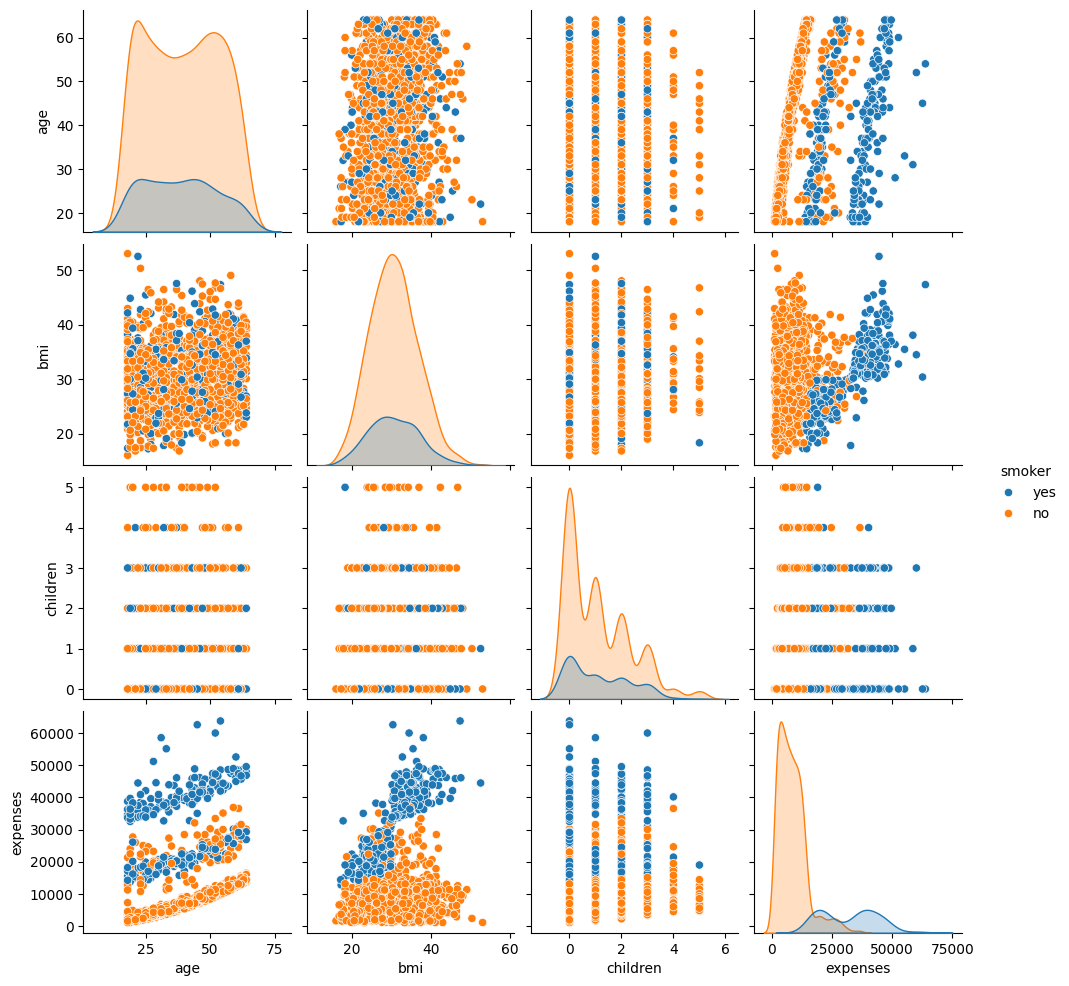

In [12]:
sns.pairplot(df, hue="smoker")
plt.show()

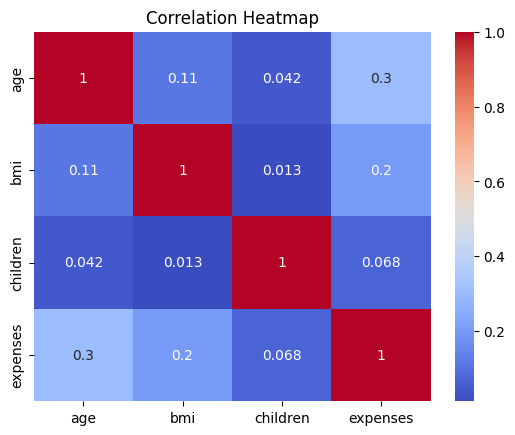

In [13]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [14]:
df.head(10)
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head(10)

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.9,0,16884.92,False,True,False,False,True
1,18,33.8,1,1725.55,True,False,False,True,False
2,28,33.0,3,4449.46,True,False,False,True,False
3,33,22.7,0,21984.47,True,False,True,False,False
4,32,28.9,0,3866.86,True,False,True,False,False
5,31,25.7,0,3756.62,False,False,False,True,False
6,46,33.4,1,8240.59,False,False,False,True,False
7,37,27.7,3,7281.51,False,False,True,False,False
8,37,29.8,2,6406.41,True,False,False,False,False
9,60,25.8,0,28923.14,False,False,True,False,False


In [15]:
from sklearn.model_selection import train_test_split
X = df_encoded.drop("expenses", axis=1)
y = df_encoded["expenses"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 33600065.36
R-squared (R²): 0.78


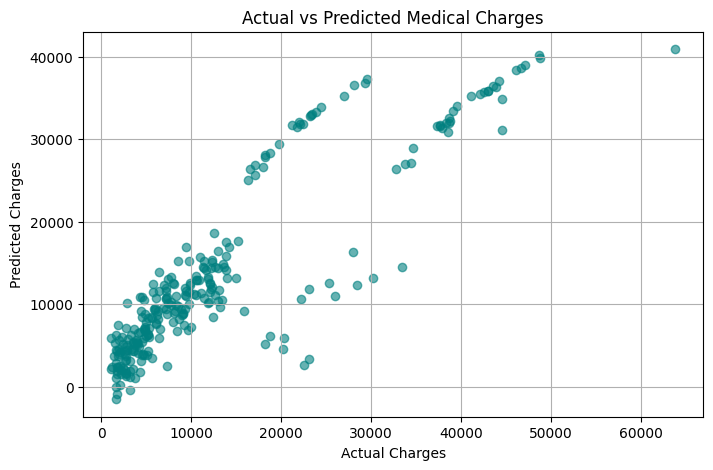

In [16]:
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred, alpha=0.6, color='teal')
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.title("Actual vs Predicted Medical Charges")
plt.grid(True)
plt.show()